In [2]:
import numpy as np
import matplotlib.pyplot as plt


Encontrando o valor de Pi

In [3]:
# Computation of pi by stocastic method
N = 10**7 # Number of realizations
Nc = 0
for i in range(N):
    x = -1.0 + 2.0*np.random.rand()
    y = -1.0 + 2.0*np.random.rand()
    if (x**2 + y**2 < 1.0):
        Nc = Nc + 1

Prob = Nc / N
print('The estimate for pi is:', 4*Prob)
#funções da lista 02

The estimate for pi is: 3.1413528


In [4]:

def matrizes(conec,c):
    nc = len(conec)
    nv = max(conec[:,0])
   
    #K = np.diag(c)
    K = np.zeros(shape=(nc, nc))
    d = np.zeros(shape=(nc, nv))

    for i in range(nc):
        K[i,i] = c[i]

    for k in range(nc):
        for j in range(nv):
            j1 = conec[k,0]-1
            j2 =conec[k,1]-1
            d[k,j1] = 1
            d[k,j2] = -1 
    
    return K, d

In [5]:
def Assembly(conec, c, nv, nc):
    a = np.zeros(shape=(nv, nv)) #matriz zerada
 
    for k in range(nc):
        n1 =conec[k,0]
        n2=conec[k,1]
        a[n1,n2] += c[k]
        a[n2,n1] += c[k]
        a[n1,n1] += c[k]
        a[n2,n2] += c[k]

    for i in range(nv):
        for j in range(nv):
            if( i != j and a[i,j] !=0):
                a[i,j]*=-1
    
    return a

In [6]:

def calc_vazao(conec, c, pressao):
    nc = len(conec)
    nv = max(conec[:, 0])
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conect, c)
    Q =((K @ D) @ pressao) 

    return Q

def calc_W(conec, pressao):
    nc = len(conec)
    nv = max(conec[:, 0])
    K = np.zeros(shape=(nc, nc))
    D = np.zeros(shape=(nc,nv))

    K, D = matrizes(conec, vet)
    #Q =((K @ D) @ pressao) 

    W = np.transpose(pressao) @ (np.transpose(D)@ K @ D)@ pressao

    return W


In [7]:
def SolveNetwork(conec,c, natm, nb, qb,nv, nc):
    Atilde = Assembly(conec, c, nv, nc)
    
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    b = np.zeros(shape=(len(Atilde), 1))
    b[nb] = qb
    pressure = np.linalg.solve(Atilde, b)
    return pressure


In [8]:
def GeraRede(nx,ny,CH,CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
      for j in range(ny):
        ig = i + j*nx
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
          k = j*(nx-1) + i
          conec[k,0] = j*nx + i
          conec[k,1] = j*nx + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(nx):
      for j in range(ny-1):
          k = (nx-1)*ny + j*nx + i
          conec[k,0] = i + j*nx
          conec[k,1] = i + (j+1)*nx
          C[k] = CV

    return nv, nc, conec, C, coord

Funções graficas

In [9]:
def PlotPressure(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    cp = plt.contourf(X, Y, Z, cmap='jet')
    cb = plt.colorbar(cp)
    plt.show()

def PlotPressureAsSurface(nx, ny, pressure):
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (ny,nx)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Contours of pressure')
    ax.grid()
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$')
    ax.view_init(elev=30., azim=45)
    plt.show()

In [10]:
def RandomFailFinos(C, pO, Centup):
    Cnew = np.copy(C)
    nc = len(C)
    for k in range(nc):
        x = np.random.rand()
        #print(x)
        if(x <= pO):
            Cnew[k] = Centup
             
    print(Cnew)
    return Cnew

In [11]:
CH = 2.0
CV = 2.0
nx, ny = 10, 10
nv, nc, conec, C, coord = GeraRede(nx, ny , CH, CV)
#print(nv, nc, conec, len(C))
lst = [0, 1, 2, 30, 31, 32, 93, 103, 113]
C[lst] = 20.0
#print(C)
qb = 10
nb = 0
natm = nv -1
#print(natm)

0.4664424927632992
[ 0.2  0.2 20.   2.   2.   0.2  0.2  2.   2.   0.2  0.2  2.   0.2  2.
  0.2  2.   0.2  2.   2.   2.   2.   2.   0.2  2.   2.   2.   2.   0.2
  0.2  2.  20.  20.   0.2  0.2  2.   0.2  2.   0.2  0.2  2.   2.   2.
  0.2  2.   2.   0.2  2.   2.   2.   2.   0.2  2.   0.2  0.2  0.2  2.
  2.   0.2  2.   0.2  0.2  2.   0.2  2.   0.2  2.   2.   2.   2.   2.
  2.   0.2  0.2  2.   0.2  2.   0.2  0.2  0.2  2.   2.   2.   2.   2.
  2.   0.2  2.   2.   2.   2.   2.   2.   2.   0.2  0.2  0.2  2.   2.
  2.   2.   0.2  0.2  2.  20.   2.   0.2  0.2  2.   0.2  2.   0.2  2.
  0.2 20.   2.   0.2  0.2  2.   0.2  2.   2.   2.   2.   2.   0.2  2.
  2.   0.2  0.2  2.   2.   0.2  2.   2.   0.2  0.2  0.2  2.   2.   2.
  0.2  2.   2.   0.2  0.2  2.   0.2  0.2  0.2  0.2  0.2  2.   0.2  0.2
  0.2  2.   2.   0.2  0.2  2.   0.2  2.   0.2  0.2  2.   0.2  2.   0.2
  2.   2.   2.   0.2  0.2  2.   0.2  0.2  0.2  2.   2.   2. ]
[[46.6278816 ]
 [30.4325512 ]
 [19.90537091]
 [19.83307945]
 [19.26771219]
 

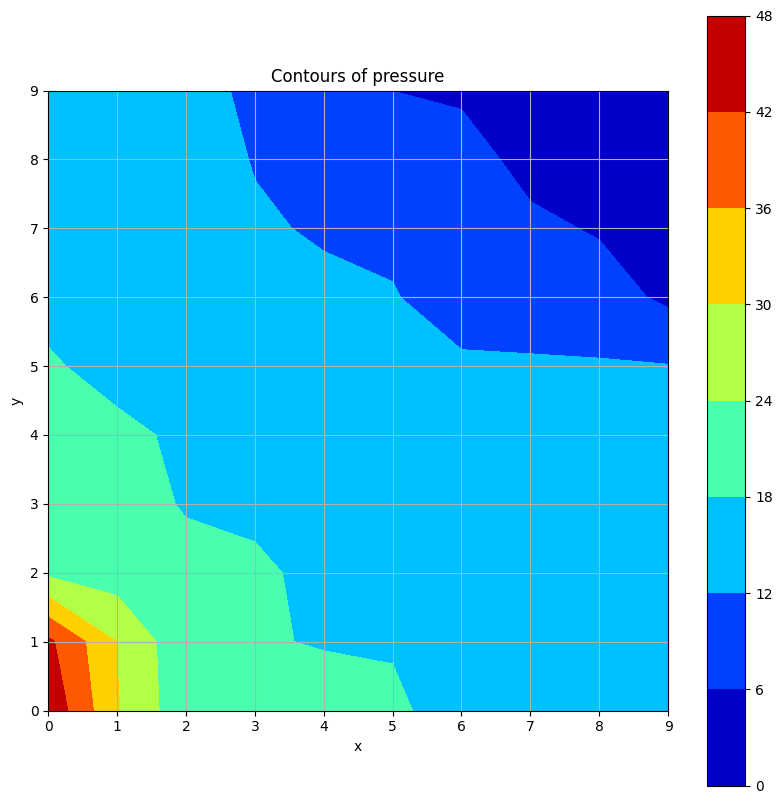

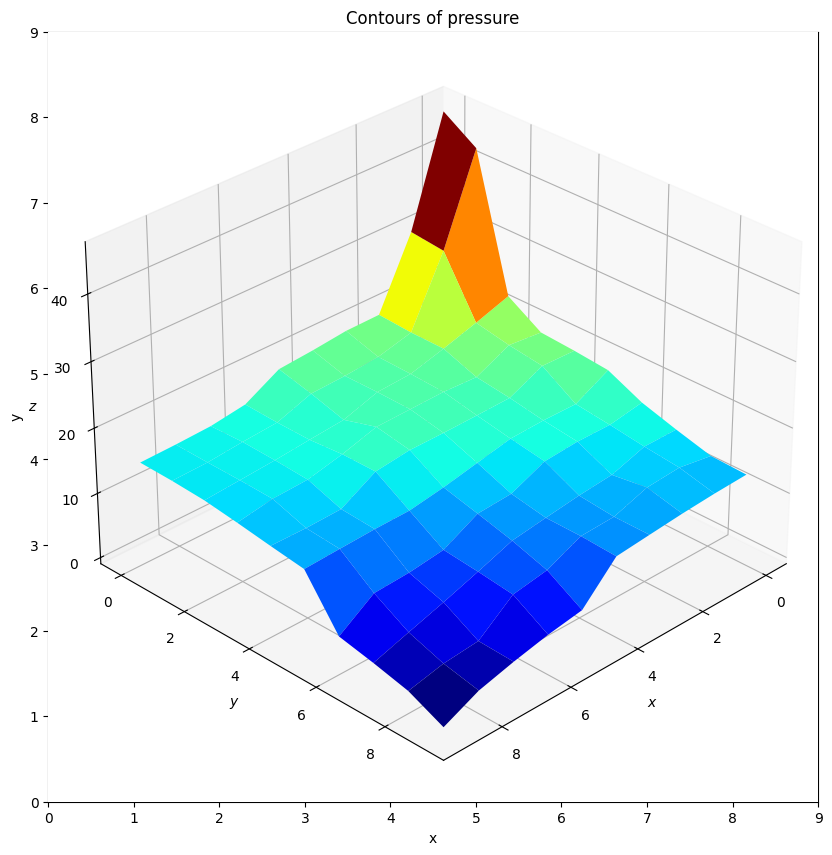

In [12]:
prob = np.random.rand()
print(prob)
centup = 0.2
Novacond = RandomFailFinos(C,prob,centup)
Pressao = SolveNetwork(conec, Novacond, natm, nb,qb, nv,nc)
print(Pressao)
pmax = np.max(Pressao)
PlotPressure(nx, ny,Pressao)
PlotPressureAsSurface(nx,ny, Pressao)